In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('creditcard.csv')
df = df.sample(frac=1).reset_index(drop='True')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,136712.0,-0.359308,0.202051,1.450022,4.336258,0.939703,2.721715,-0.964710,0.894128,-1.029733,...,0.293681,0.988096,0.318780,-1.676660,-2.136351,0.160305,0.311136,0.338727,41.06,0
1,94006.0,0.075847,1.209608,-0.157902,-0.405879,1.277910,-0.653519,1.066578,-0.300710,0.881857,...,-0.338766,-0.604419,0.151850,0.479133,-1.168821,-0.044579,0.173504,0.262308,1.98,0
2,130111.0,-0.656619,0.395337,-0.288348,-1.325402,2.028209,4.090790,-0.744053,1.573678,0.206402,...,0.391698,1.050449,-0.167973,0.741426,-0.221583,-0.101159,0.103797,0.096762,15.94,0
3,13389.0,-0.075616,2.417026,-3.038112,1.415881,1.353048,-0.363680,-0.017627,0.823582,0.484086,...,-0.242818,-0.345549,0.050256,-1.730479,-0.275293,-0.336730,0.102005,-0.081776,0.89,0
4,57149.0,-1.408328,1.570935,1.604217,0.971720,-0.969752,-0.798742,-0.241997,0.827837,-0.819706,...,-0.022582,-0.449660,-0.047503,0.663448,0.083628,-0.516456,-0.277601,-0.060505,5.00,0


In [7]:
fraud = df.loc[df['Class']==1]
nonfraud = df.loc[df['Class']==0]
print(len(fraud))
print(len(nonfraud))

492
284315


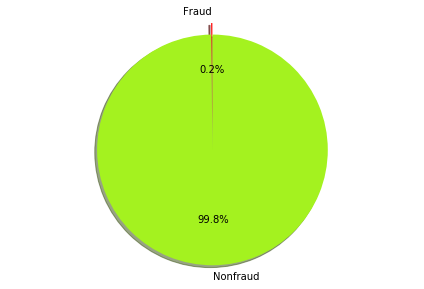

In [9]:
import matplotlib.pyplot as plt
sizes = [len(fraud),len(nonfraud)]
explode = (0.1,0)
labels = ['Fraud','Nonfraud']
colors = ['#ff0000','#a4f21f']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

Time for machine learning

In [10]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split


In [38]:
x = df.iloc[:,:-1]
y = df['Class']
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.45)

In [39]:
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(X_train,y_train)
print('Score: ',logistic.score(X_test,y_test))

/home/sayan/snap/jupyter/common/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score:  0.9989310570831123


In [29]:
import numpy as np
y_predicted = np.array(logistic.predict(X_test))
print(y_predicted)

[0 0 0 ... 0 0 0]
